In [31]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [32]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [33]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from mpl_toolkits.basemap import Basemap
from scipy.io import loadmat
import cmocean 
import warnings
import arrow
from salishsea_tools import viz_tools, places
import netCDF4 as nc
import pickle
from salishsea_tools import visualisations as vis
#import LambertConformalTicks as lct

%matplotlib inline
plt.rcParams['font.size'] = 11
warnings.simplefilter('ignore')

# code for extracting OmA averages -summer

#### - BR3 summer - jun 20 - sept 22 and jun 1-aug31
#### - PI3rr summer - jun 20 - sept 22 and jun 1-aug31

#summer is june 20th to sept 22
#winter is dec 21 to thursday march 19

In [34]:
# start ='2015-06-01'
# end ='2015-08-31'

# start_run = arrow.get(start)
# end_run = arrow.get(end)

# arrow_array = []

# for r in arrow.Arrow.span_range('day', start_run, end_run):
#     arrow_array.append(r)

# dayslen = len(arrow_array)

# BR_oma_summer = np.zeros([dayslen,40,898,398])

# for i in range(0,dayslen):

#     tdate = arrow_array[i][0]
#     ymd = tdate.format('YYYYMMDD')

#     if i%10 == 0:
#         print(ymd)
#     t_pco2 = nc.Dataset('//data/tjarniko/results/BASERUN_EXP/Oma_calc/PI4_OmA_plus_'+ymd+'.nc')
#     t_Oma = t_pco2['model_output']['OmA'][:,:,:]
#     BR_oma_summer[i,:,:,:] = t_Oma

# BR_oma_summer_mean = np.nanmean(BR_oma_summer,axis=0)
# pickle.dump(BR_oma_summer_mean, open("./pkls/PI4_Oma_SUMMERmean_01jun_31aug.pkl", 'wb'))
# print(np.shape(BR_oma_summer_mean))

# code for extracting OmA averages -winter

#### - BR3 winter - dec 21 - mar 19 and dec 1- feb 28
#### - PI3rr winter - dec 21 - mar 19 and dec 1- feb 28

## need to do extraction for PI4 - will need to be rerun after last 14 days are done.

In [35]:
# start ='2015-12-01'
# end ='2015-12-31'

# start_run = arrow.get(start)
# end_run = arrow.get(end)

# arrow_array1 = []

# for r in arrow.Arrow.span_range('day', start_run, end_run):
#     arrow_array1.append(r)
# dayslen = len(arrow_array1)

# BR_oma_winter1 = np.zeros([dayslen,40,898,398])

# for i in range(0,dayslen):

#     tdate = arrow_array1[i][0]
#     ymd = tdate.format('YYYYMMDD')

#     if i%10 == 0:
#         print(ymd)
#     t_pco2 = nc.Dataset('//data/tjarniko/results/BASERUN_EXP/Oma_calc/BR3_OmA_plus_'+ymd+'.nc')
#     t_Oma = t_pco2['model_output']['OmA'][:,:,:]
#     BR_oma_winter1[i,:,:,:] = t_Oma

# start ='2015-01-01'
# end ='2015-02-28'

# start_run = arrow.get(start)
# end_run = arrow.get(end)
# arrow_array2 = []

# for r in arrow.Arrow.span_range('day', start_run, end_run):
#     arrow_array2.append(r)
# dayslen = len(arrow_array2)

# BR_oma_winter2 = np.zeros([dayslen,40,898,398])

# for i in range(0,dayslen):

#     tdate = arrow_array2[i][0]
#     ymd = tdate.format('YYYYMMDD')

#     if i%10 == 0:
#         print(ymd)
#     t_pco2 = nc.Dataset('//data/tjarniko/results/BASERUN_EXP/Oma_calc/PI4_OmA_plus_'+ymd+'.nc')
#     t_Oma = t_pco2['model_output']['OmA'][:,:,:]
#     BR_oma_winter2[i,:,:,:] = t_Oma

# BR_oma_winter = np.concatenate((BR_oma_winter1,BR_oma_winter2),axis=0)
# print(np.shape(BR_oma_winter))
# BR_oma_winter_mean = np.nanmean(BR_oma_winter,axis=0)
# pickle.dump(BR_oma_winter_mean, open("../pkls/PI4_Oma_WINTERmean_01dec_28feb.pkl", 'wb'))




In [36]:
BR3_summer_3mon = pickle.load(open('../pkls/aragonite/BR3_Oma_SUMMERmean_01jun_31aug.pkl', 'rb'))  
BR3_winter_3mon = pickle.load(open('../pkls/aragonite/BR3_Oma_WINTERmean_01dec_28feb.pkl', 'rb'))  
PI4_summer_3mon = pickle.load(open('../pkls/aragonite/PI4_Oma_SUMMERmean_01jun_31aug.pkl', 'rb'))  
PI4_winter_3mon = pickle.load(open('../pkls/aragonite/PI4_Oma_WINTERmean_01dec_28feb.pkl', 'rb'))  



In [37]:
days = np.arange(1,366,1)
tcm = cmocean.cm.phase
lw = 2.5

BR_under_0pt5_vol = pickle.load(open('../KEY_OMA/domain_undersat_pickles/BR_under_0pt5_vol.pkl', 'rb'))   
BR_under_0pt6_vol = pickle.load(open('../KEY_OMA/domain_undersat_pickles/BR_under_0pt6_vol.pkl', 'rb'))   
BR_under_0pt7_vol = pickle.load(open('../KEY_OMA/domain_undersat_pickles//BR_under_0pt7_vol.pkl', 'rb'))   
BR_under_0pt8_vol = pickle.load(open('../KEY_OMA/domain_undersat_pickles//BR_under_0pt8_vol.pkl', 'rb'))   
BR_under_0pt9_vol = pickle.load(open('../KEY_OMA/domain_undersat_pickles//BR_under_0pt9_vol.pkl', 'rb'))   
BR_under_1pt0_vol = pickle.load(open('../KEY_OMA/domain_undersat_pickles//BR_under_1pt0_vol.pkl', 'rb'))   
BR_under_1pt1_vol = pickle.load(open('../KEY_OMA/domain_undersat_pickles//BR_under_1pt1_vol.pkl', 'rb'))   
BR_under_1pt2_vol = pickle.load(open('../KEY_OMA/domain_undersat_pickles//BR_under_1pt2_vol.pkl', 'rb'))   
BR_under_1pt3_vol = pickle.load(open('../KEY_OMA/domain_undersat_pickles//BR_under_1pt3_vol.pkl', 'rb'))   
BR_under_1pt4_vol = pickle.load(open('../KEY_OMA/domain_undersat_pickles//BR_under_1pt4_vol.pkl', 'rb'))   
BR_under_1pt5_vol = pickle.load(open('../KEY_OMA/domain_undersat_pickles//BR_under_1pt5_vol.pkl', 'rb')) 

PI_under_0pt5_vol = pickle.load(open('../KEY_OMA/domain_undersat_pickles/PI4_under_0pt5_vol.pkl', 'rb'))   
PI_under_0pt6_vol = pickle.load(open('../KEY_OMA/domain_undersat_pickles/PI4_under_0pt6_vol.pkl', 'rb'))   
PI_under_0pt7_vol = pickle.load(open('../KEY_OMA/domain_undersat_pickles//PI4_under_0pt7_vol.pkl', 'rb'))   
PI_under_0pt8_vol = pickle.load(open('../KEY_OMA/domain_undersat_pickles//PI4_under_0pt8_vol.pkl', 'rb'))   
PI_under_0pt9_vol = pickle.load(open('../KEY_OMA/domain_undersat_pickles//PI4_under_0pt9_vol.pkl', 'rb'))   
PI_under_1pt0_vol = pickle.load(open('../KEY_OMA/domain_undersat_pickles//PI4_under_1pt0_vol.pkl', 'rb'))   
PI_under_1pt1_vol = pickle.load(open('../KEY_OMA/domain_undersat_pickles//PI4_under_1pt1_vol.pkl', 'rb'))   
PI_under_1pt2_vol = pickle.load(open('../KEY_OMA/domain_undersat_pickles//PI4_under_1pt2_vol.pkl', 'rb'))   
PI_under_1pt3_vol = pickle.load(open('../KEY_OMA/domain_undersat_pickles//PI4_under_1pt3_vol.pkl', 'rb'))   
PI_under_1pt4_vol = pickle.load(open('../KEY_OMA/domain_undersat_pickles//PI4_under_1pt4_vol.pkl', 'rb'))   
PI_under_1pt5_vol = pickle.load(open('../KEY_OMA/domain_undersat_pickles//PI4_under_1pt5_vol.pkl', 'rb'))   

## 'Nicest' plot so far - 3 month averages

In [38]:
# bathy = nc.Dataset('/data/tjarniko/MEOPAR/grid/bathymetry_201702.nc')
# mesh = nc.Dataset('/data/tjarniko/MEOPAR/grid/mesh_mask201702.nc')
# ts = 14 # title font
# fs = 10.5 # all other font sizes
# fact = 1
# fig = plt.figure(figsize=(12*fact, 9.5*fact))

# ax1 = plt.subplot2grid((6,8), (0,0), colspan=4, rowspan=2)
# cbar = \
# vis.contour_thalweg(ax1, PI4_summer_3mon, bathy, mesh,\
#                     np.arange(0.0, 2.0, 0.05), cmap = cmocean.cm.balance_r)
# ax1.set_title('$\Omega_A$ Summer Average (PI Run)',fontsize = ts)
# cbar.ax.tick_params(labelsize=fs) 
# cbar.set_label('$\Omega_A$', fontsize = fs)
# ax1.tick_params(axis='both', which='major', labelsize=fs)
# ax1.set_xlabel('km along thalweg')
# ax1.text(0.03, 0.05, 'a)', transform=ax1.transAxes, fontsize=16, fontweight='bold', va='bottom')

# ax2 = plt.subplot2grid((6,8), (0,4), colspan=4, rowspan=2)
# cbar = \
# vis.contour_thalweg(ax2, PI4_winter_3mon, bathy, mesh,\
#                     np.arange(0.0, 2.0, 0.05), cmap = cmocean.cm.balance_r)
# ax2.set_title('$\Omega_A$ Winter Average (PI Run)',fontsize = ts)
# cbar.ax.tick_params(labelsize=fs) 
# cbar.set_label('$\Omega_A$', fontsize = fs)
# ax2.tick_params(axis='both', which='major', labelsize=fs)
# ax2.set_xticklabels([])
# ax2.set_xlabel('')
# ax2.set_xlabel('km along thalweg')
# ax2.text(0.03, 0.05, 'b)', transform=ax2.transAxes, fontsize=16, fontweight='bold', va='bottom')


# ax3 = plt.subplot2grid((6,8), (2,0), colspan=4, rowspan=2)
# cbar = \
# vis.contour_thalweg(ax3, BR3_summer_3mon, bathy, mesh,\
#                     np.arange(0.0, 2.0, 0.05), cmap = cmocean.cm.balance_r)
# ax3.set_title('$\Omega_A$ Summer Average (BR Run)',fontsize = ts)
# cbar.ax.tick_params(labelsize=fs) 
# cbar.set_label('$\Omega_A$', fontsize = fs)
# ax3.tick_params(axis='both', which='major', labelsize=fs)
# ax3.set_xlabel('km along thalweg')
# ax3.text(0.03, 0.05, 'c)', transform=ax3.transAxes, fontsize=16, fontweight='bold', va='bottom')


# ax4 = plt.subplot2grid((6,8), (2,4), colspan=4, rowspan=2)
# cbar = \
# vis.contour_thalweg(ax4, BR3_winter_3mon, bathy, mesh,\
#                     np.arange(0.0, 2.0, 0.05), cmap = cmocean.cm.balance_r)
# ax4.set_title('$\Omega_A$ Winter Average (BR Run)',fontsize = ts)
# cbar.ax.tick_params(labelsize=fs) 
# cbar.set_label('$\Omega_A$', fontsize = fs)
# ax4.tick_params(axis='both', which='major', labelsize=fs)
# ax4.set_xlabel('km along thalweg')
# ax4.text(0.03, 0.05, 'd)', transform=ax4.transAxes, fontsize=16, fontweight='bold', va='bottom')


# ax5 = plt.subplot2grid((6,8), (4,0), colspan=6, rowspan=2)
# days = np.arange(1,366,1)
# tcm = cmocean.cm.phase
# # ax5.plot(days,BR_under_0pt5_vol*100,\
# #         color = tcm(1.*0/11),linewidth = lw, linestyle = '-', label = 'BR - domain under $\Omega_A$ 0.5')
# # ax5.plot(days,PI_under_0pt5_vol*100,\
# #         color = tcm(1.*0/11),linewidth = lw, linestyle = ':', label = 'PI - domain under $\Omega_A$ 0.5')
# # ax5.fill_between(days, BR_under_0pt5_vol*100, PI_under_0pt5_vol*100, \
# #                  color = tcm(1.*0/11), alpha = 0.2 )
# # ax5.plot(days,BR_under_0pt7_vol*100,\
# #         color = tcm(1.*2/11),linewidth = lw, linestyle = '-', label = 'BR - domain under $\Omega_A$ 0.7')
# # ax5.plot(days,PI_under_0pt7_vol*100,\
# #         color = tcm(1.*2/11),linewidth = lw, linestyle = ':', label = 'PI - domain under $\Omega_A$ 0.7')
# # ax5.fill_between(days, BR_under_0pt7_vol*100, PI_under_0pt7_vol*100, \
# #                  color = tcm(1.*2/11), alpha = 0.2 )
# # ax5.plot(days,BR_under_1pt0_vol*100,\
# #         color = tcm(1.*5/11),linewidth = lw, linestyle = '-', label = 'BR - domain under $\Omega_A$ 1.0')
# # ax5.plot(days,PI_under_1pt0_vol*100,\
# #         color = tcm(1.*5/11),linewidth = lw, linestyle = ':', label = 'PI - domain under $\Omega_A$ 1.0')
# # ax5.fill_between(days, BR_under_1pt0_vol*100, PI_under_1pt0_vol*100, \
# #                  color = tcm(1.*5/11), alpha = 0.2 )
# # ax5.plot(days,BR_under_1pt3_vol*100,\
# #         color = tcm(1.*8/11),linewidth = lw, linestyle = '-', label = 'BR - domain under $\Omega_A$ 1.3')
# # ax5.plot(days,PI_under_1pt3_vol*100,\
# #         color = tcm(1.*8/11),linewidth = lw, linestyle = ':', label = 'PI - domain under $\Omega_A$ 1.3')
# # ax5.fill_between(days, BR_under_1pt3_vol*100, PI_under_1pt3_vol*100, \
# #                  color = tcm(1.*8/11), alpha = 0.2 )

# # ax5.plot(days,BR_under_1pt5_vol*100,\
# #         color = tcm(1.*10/11),linewidth = lw, linestyle = '-', label = 'BR - domain under $\Omega_A$ 1.5')
# # ax5.plot(days,PI_under_1pt5_vol*100,\
# #         color = tcm(1.*10/11),linewidth = lw, linestyle = ':', label = 'PI - domain under $\Omega_A$ 1.5')
# # ax5.fill_between(days, BR_under_1pt5_vol*100, PI_under_1pt5_vol*100, \
# #                  color = tcm(1.*10/11), alpha = 0.2 )
# fig.tight_layout()
# ax5.tick_params(axis='both', which='major', labelsize=fs)
# ax5.legend(bbox_to_anchor=[1.04, 1.09], fontsize = fs-0.5)
# #ax5.legend(loc = 'best')
# w = ax5.set_xticks(np.arange(0, 365, step=30))
# ax5.set_xlim(0,365)
# w = ax5.set_yticks(np.arange(0, 110, step=10))
# ax5.set_ylabel('% domain volume \n below threshold', fontsize = fs)
# #ax5.set_title('Shift in % domain volume below a given threshold', fontsize = 18)
# ax5.set_xlabel('days', fontsize = fs)
# ax5.text(0.02, 0.05, 'e)', transform=ax5.transAxes, fontsize=16, fontweight='bold', va='bottom')


In [39]:
#remove dark lines
# for i in range(0,898):
#     if i%40 == 0:
#         print(i)
#     for j in range(0,398):
#         w = PI4_winter_3mon[:,i,j]
#         wherenull = np.where(w>1e10)
        
#         firstnull = (wherenull[0][0])
#         lastval = firstnull - 1
#         PI4_winter_3mon[firstnull:40,i,j] = w[lastval]


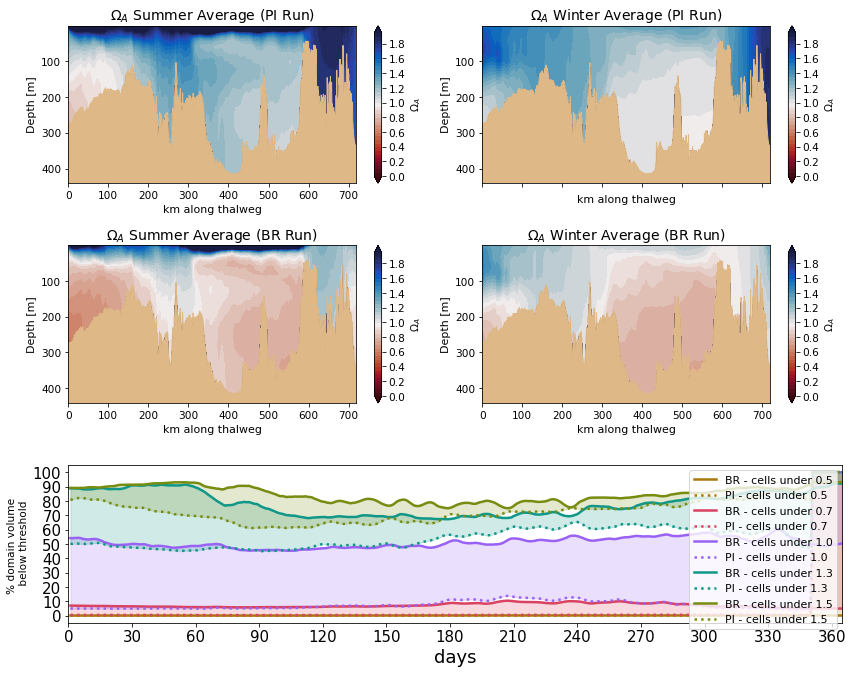

In [40]:
bathy = nc.Dataset('/data/tjarniko/MEOPAR/grid/bathymetry_201702.nc')
mesh = nc.Dataset('/data/tjarniko/MEOPAR/grid/mesh_mask201702.nc')
ts = 14 # title font
fs = 10.5 # all other font sizes
fact = 1
fig = plt.figure(figsize=(12*fact, 9.5*fact))

ax1 = plt.subplot2grid((3,4), (0,0), colspan=2, rowspan=1)
cbar = \
vis.contour_thalweg(ax1, PI4_summer_3mon, bathy, mesh,\
                    np.arange(0.0, 2.0, 0.05), cmap = cmocean.cm.balance_r)
ax1.set_title('$\Omega_A$ Summer Average (PI Run)',fontsize = ts)
cbar.ax.tick_params(labelsize=fs) 
cbar.set_label('$\Omega_A$', fontsize = fs)
ax1.tick_params(axis='both', which='major', labelsize=fs)
ax1.set_xlabel('km along thalweg')

ax2 = plt.subplot2grid((3,4), (0,2), colspan=2, rowspan=1)
cbar = \
vis.contour_thalweg(ax2, PI4_winter_3mon, bathy, mesh,\
                    np.arange(0.0, 2.0, 0.05), cmap = cmocean.cm.balance_r)
ax2.set_title('$\Omega_A$ Winter Average (PI Run)',fontsize = ts)
cbar.ax.tick_params(labelsize=fs) 
cbar.set_label('$\Omega_A$', fontsize = fs)
ax2.tick_params(axis='both', which='major', labelsize=fs)
ax2.set_xticklabels([])
ax2.set_xlabel('')
ax2.set_xlabel('km along thalweg')

ax3 = plt.subplot2grid((3,4), (1,0), colspan=2, rowspan=1)
cbar = \
vis.contour_thalweg(ax3, BR3_summer_3mon, bathy, mesh,\
                    np.arange(0.0, 2.0, 0.05), cmap = cmocean.cm.balance_r)
ax3.set_title('$\Omega_A$ Summer Average (BR Run)',fontsize = ts)
cbar.ax.tick_params(labelsize=fs) 
cbar.set_label('$\Omega_A$', fontsize = fs)
ax3.tick_params(axis='both', which='major', labelsize=fs)
ax3.set_xlabel('km along thalweg')

ax4 = plt.subplot2grid((3,4), (1,2), colspan=2, rowspan=1)
cbar = \
vis.contour_thalweg(ax4, BR3_winter_3mon, bathy, mesh,\
                    np.arange(0.0, 2.0, 0.05), cmap = cmocean.cm.balance_r)
ax4.set_title('$\Omega_A$ Winter Average (BR Run)',fontsize = ts)
cbar.ax.tick_params(labelsize=fs) 
cbar.set_label('$\Omega_A$', fontsize = fs)
ax4.tick_params(axis='both', which='major', labelsize=fs)
ax4.set_xlabel('km along thalweg')

ax5 = plt.subplot2grid((3,4), (2,0), colspan=4, rowspan=1)
ax5.plot(days,BR_under_0pt5_vol*100,\
        color = tcm(1.*0/11),linewidth = lw, linestyle = '-', label = 'BR - cells under 0.5')
ax5.plot(days,PI_under_0pt5_vol*100,\
        color = tcm(1.*0/11),linewidth = lw, linestyle = ':', label = 'PI - cells under 0.5')
ax5.fill_between(days, BR_under_0pt5_vol*100, PI_under_0pt5_vol*100, \
                 color = tcm(1.*0/11), alpha = 0.2 )
ax5.plot(days,BR_under_0pt7_vol*100,\
        color = tcm(1.*2/11),linewidth = lw, linestyle = '-', label = 'BR - cells under 0.7')
ax5.plot(days,PI_under_0pt7_vol*100,\
        color = tcm(1.*2/11),linewidth = lw, linestyle = ':', label = 'PI - cells under 0.7')
ax5.fill_between(days, BR_under_0pt7_vol*100, PI_under_0pt7_vol*100, \
                 color = tcm(1.*2/11), alpha = 0.2 )
ax5.plot(days,BR_under_1pt0_vol*100,\
        color = tcm(1.*5/11),linewidth = lw, linestyle = '-', label = 'BR - cells under 1.0')
ax5.plot(days,PI_under_1pt0_vol*100,\
        color = tcm(1.*5/11),linewidth = lw, linestyle = ':', label = 'PI - cells under 1.0')
ax5.fill_between(days, BR_under_1pt0_vol*100, PI_under_1pt0_vol*100, \
                 color = tcm(1.*5/11), alpha = 0.2 )
ax5.plot(days,BR_under_1pt3_vol*100,\
        color = tcm(1.*8/11),linewidth = lw, linestyle = '-', label = 'BR - cells under 1.3')
ax5.plot(days,PI_under_1pt3_vol*100,\
        color = tcm(1.*8/11),linewidth = lw, linestyle = ':', label = 'PI - cells under 1.3')
ax5.fill_between(days, BR_under_1pt3_vol*100, PI_under_1pt3_vol*100, \
                 color = tcm(1.*8/11), alpha = 0.2 )

ax5.plot(days,BR_under_1pt5_vol*100,\
        color = tcm(1.*10/11),linewidth = lw, linestyle = '-', label = 'BR - cells under 1.5')
ax5.plot(days,PI_under_1pt5_vol*100,\
        color = tcm(1.*10/11),linewidth = lw, linestyle = ':', label = 'PI - cells under 1.5')
ax5.fill_between(days, BR_under_1pt5_vol*100, PI_under_1pt5_vol*100, \
                 color = tcm(1.*10/11), alpha = 0.2 )

ax5.tick_params(axis='both', which='major', labelsize=15)
#ax5.legend(bbox_to_anchor=[1.4, 0.9], fontsize = fs-4.5)
ax5.legend(loc = 'best')
w = ax5.set_xticks(np.arange(0, 365, step=30))
ax5.set_xlim(0,365)
w = ax5.set_yticks(np.arange(0, 110, step=10))
ax5.set_ylabel('% domain volume \n below threshold', fontsize = fs)
#ax5.set_title('Shift in % domain volume below a given threshold', fontsize = 18)
ax5.set_xlabel('days', fontsize = 18)

fig.tight_layout()

In [41]:
print('dear github please render this properly')

dear github please render this properly


In [42]:
BR3_winter_nn = BR3_winter_3mon[BR3_winter_3mon<1e10]
BR3_summer_nn = BR3_summer_3mon[BR3_summer_3mon<1e10]
PI4_winter_nn = PI4_winter_3mon[PI4_winter_3mon<1e10]
PI4_summer_nn = PI4_summer_3mon[PI4_summer_3mon<1e10]

PI4_summer_0s = PI4_summer_nn[PI4_summer_nn == 0]
PI4_winter_0s = PI4_winter_nn[PI4_winter_nn == 0]
BR3_summer_0s = BR3_summer_nn[BR3_summer_nn == 0]
BR3_winter_0s = BR3_winter_nn[BR3_winter_nn == 0]
print(np.max(BR3_summer_nn))
print(np.shape(PI4_summer_0s))
print(np.shape(BR3_summer_0s))
print(1061/(40*898*398)*100)

3.272944538489632
(1061,)
(1061,)
0.007421573345569719


In [64]:



step = 0.1
t_start = 0
t_end = 4
bin_starts = np.arange(t_start,t_end,step)
bin_ends = np.arange(t_start+step,t_end+step,step)
bin_centres = np.arange(t_start+step/2,t_end + step/2 ,step)
bin_prop = np.zeros_like(bin_centres)

def manual_hist(test_hist):
    for i in range(0,len(bin_starts)):
        obs_in_bin = test_hist[((test_hist>=bin_starts[i]) &\
                               (test_hist<bin_ends[i]))]

        bin_prop[i] = np.size(obs_in_bin)/np.size(test_hist)
    return bin_prop

# bin_propLA = manual_hist(LA_nonan)
# t_LA = np.copy(bin_propLA)
bin_propBR3_winter = manual_hist(BR3_winter_nn)
t_BR3_winter = np.copy(bin_propBR3_winter)
bin_propPI4_winter = manual_hist(PI4_winter_nn)
t_PI4_winter = np.copy(bin_propPI4_winter)
bin_propBR3_summer = manual_hist(BR3_summer_nn)
t_BR3_summer = np.copy(bin_propBR3_summer)
bin_propPI4_summer = manual_hist(PI4_summer_nn)
t_PI4_summer = np.copy(bin_propPI4_summer)


(40, 898, 398)


(0, 3.5)

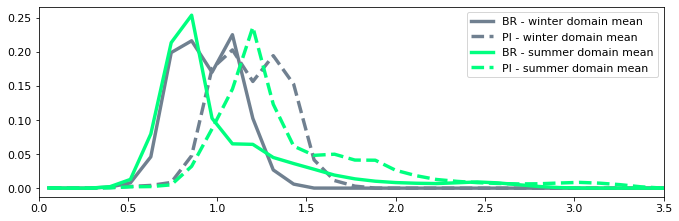

In [139]:
csize = pickle.load(open('../pkls/cellsize_alg2.pkl', 'rb'))
print(np.shape(csize))

BR3_summer_3mon = pickle.load(open('../pkls/aragonite/BR3_Oma_SUMMERmean_01jun_31aug.pkl', 'rb'))  
BR3_winter_3mon = pickle.load(open('../pkls/aragonite/BR3_Oma_WINTERmean_01dec_28feb.pkl', 'rb'))  
PI4_summer_3mon = pickle.load(open('../pkls/aragonite/PI4_Oma_SUMMERmean_01jun_31aug.pkl', 'rb'))  
PI4_winter_3mon = pickle.load(open('../pkls/aragonite/PI4_Oma_WINTERmean_01dec_28feb.pkl', 'rb'))  

csize[BR3_summer_3mon > 1e10 ] = 0


BR3_summer_nn = BR3_summer_3mon[BR3_summer_3mon<1e10]
BR3_winter_nn = BR3_winter_3mon[BR3_winter_3mon<1e10]
PI4_summer_nn = PI4_summer_3mon[PI4_summer_3mon<1e10]
PI4_winter_nn = PI4_winter_3mon[PI4_winter_3mon<1e10]



csize_nn = csize[BR3_summer_3mon<1e10]
csize_nn[np.isnan(csize_nn)] = 0


nbins = 35
hist_BR3_summer, bins = np.histogram(BR3_summer_nn, bins=nbins, range = [0, 4], weights=csize_nn)
hist_PI4_summer, bins = np.histogram(PI4_summer_nn, bins=nbins, range = [0, 4], weights=csize_nn)
hist_BR3_winter, bins = np.histogram(BR3_winter_nn, bins=nbins, range = [0, 4], weights=csize_nn)
hist_PI4_winter, bins = np.histogram(PI4_winter_nn, bins=nbins, range = [0, 4], weights=csize_nn)

bin_cent = bins + (bins[1]-bins[0])/2
tot_count = np.sum(hist_BR3_summer)
fig = plt.figure(figsize=(16*fact,5*fact))
lw = 2.5
ax1 = fig.add_subplot(1,1,1)

#ax1.plot(bin_centres,t_LA, color = 'dimgrey', lw = 3.4, label = 'LA yearly gas flux')
ax1.plot(bin_cent[0:nbins],hist_BR3_winter/tot_count, color = 'slategray', lw = 3.4,label = 'BR - winter domain mean')
ax1.plot(bin_cent[0:nbins],hist_PI4_winter/tot_count, \
         color = 'slategray', lw = 3.4, linestyle = '--', label = 'PI - winter domain mean')
ax1.plot(bin_cent[0:nbins],hist_BR3_summer/tot_count, color = 'springgreen', lw = 3.4,label = 'BR - summer domain mean')
ax1.plot(bin_cent[0:nbins],hist_PI4_summer/tot_count, \
         color = 'springgreen', lw = 3.4, linestyle = '--', label = 'PI - summer domain mean')
ax1.legend(loc = 'best')
ax1.set_xlim([0,3.5])
#ax1.set_ylim([0,.25])

In [77]:
test_ar = [0.5, np.nan, 1.2]
cell_size = [1, 1, 5]

hist, bins = np.histogram(test_ar, bins=2, range=[0, 2], weights=cell_size)

print(bins)
print(hist)

[0. 1. 2.]
[1 5]


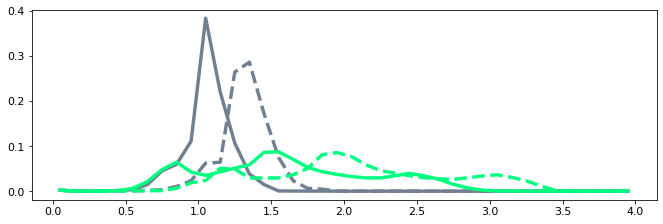

In [68]:
fig = plt.figure(figsize=(16*fact,5*fact))
lw = 2.5
ax1 = fig.add_subplot(1,1,1)
#ax1.plot(bin_centres,t_LA, color = 'dimgrey', lw = 3.4, label = 'LA yearly gas flux')
ax1.plot(bin_centres,t_BR3_winter, color = 'slategray', lw = 3.4,label = 'BR - winter domain mean')
ax1.plot(bin_centres,t_PI4_winter, \
         color = 'slategray', lw = 3.4, linestyle = '--', label = 'PI - winter domain mean')
ax1.plot(bin_centres,t_BR3_summer, color = 'springgreen', lw = 3.4,label = 'BR - summer domain mean')
ax1.plot(bin_centres,t_PI4_summer, \
         color = 'springgreen', lw = 3.4, linestyle = '--', label = 'PI - summer domain mean')

Text(0.5, 0, 'days')

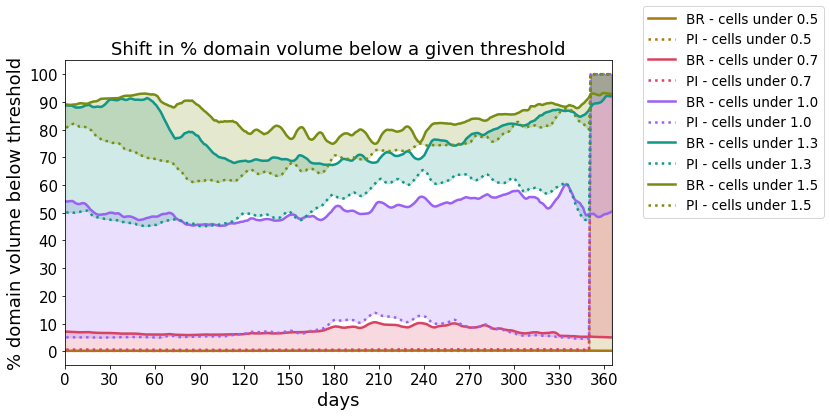

In [66]:
days = np.arange(1,366,1)
tcm = cmocean.cm.phase

fs = 18
fact = 0.7
fig = plt.figure(figsize=(14*fact,8*fact))
lw = 2.5
ax1 = fig.add_subplot(1,1,1)


ax1.plot(days,BR_under_0pt5_vol*100,\
        color = tcm(1.*0/11),linewidth = lw, linestyle = '-', label = 'BR - cells under 0.5')
ax1.plot(days,PI_under_0pt5_vol*100,\
        color = tcm(1.*0/11),linewidth = lw, linestyle = ':', label = 'PI - cells under 0.5')
ax1.fill_between(days, BR_under_0pt5_vol*100, PI_under_0pt5_vol*100, \
                 color = tcm(1.*0/11), alpha = 0.2 )

ax1.plot(days,BR_under_0pt7_vol*100,\
        color = tcm(1.*2/11),linewidth = lw, linestyle = '-', label = 'BR - cells under 0.7')
ax1.plot(days,PI_under_0pt7_vol*100,\
        color = tcm(1.*2/11),linewidth = lw, linestyle = ':', label = 'PI - cells under 0.7')
ax1.fill_between(days, BR_under_0pt7_vol*100, PI_under_0pt7_vol*100, \
                 color = tcm(1.*2/11), alpha = 0.2 )

# ax1.plot(days,BR_under_0pt9_vol*100,\
#         color = tcm(1.*4/11),linewidth = lw, linestyle = '-', label = 'BR - cells under 0.9')
# ax1.plot(days,PI_under_0pt9_vol*100,\
#          color = tcm(1.*4/11),linewidth = lw, linestyle = ':', label = 'PI - cells under 0.9')
# ax1.fill_between(days, BR_under_0pt9_vol*100, PI_under_0pt9_vol*100, \
#                  color = tcm(1.*4/11), alpha = 0.2 )

ax1.plot(days,BR_under_1pt0_vol*100,\
        color = tcm(1.*5/11),linewidth = lw, linestyle = '-', label = 'BR - cells under 1.0')
ax1.plot(days,PI_under_1pt0_vol*100,\
        color = tcm(1.*5/11),linewidth = lw, linestyle = ':', label = 'PI - cells under 1.0')
ax1.fill_between(days, BR_under_1pt0_vol*100, PI_under_1pt0_vol*100, \
                 color = tcm(1.*5/11), alpha = 0.2 )

# ax1.plot(days,BR_under_1pt1_vol*100,\
#         color = tcm(1.*6/11),linewidth = lw, linestyle = '-', label = 'BR - cells under 1.1')
# ax1.plot(days,PI_under_1pt1_vol*100,\
#         color = tcm(1.*6/11),linewidth = lw, linestyle = ':', label = 'PI - cells under 1.1')
# ax1.fill_between(days, BR_under_1pt1_vol*100, PI_under_1pt1_vol*100, \
#                  color = tcm(1.*6/11), alpha = 0.2 )

ax1.plot(days,BR_under_1pt3_vol*100,\
        color = tcm(1.*8/11),linewidth = lw, linestyle = '-', label = 'BR - cells under 1.3')
ax1.plot(days,PI_under_1pt3_vol*100,\
        color = tcm(1.*8/11),linewidth = lw, linestyle = ':', label = 'PI - cells under 1.3')
ax1.fill_between(days, BR_under_1pt3_vol*100, PI_under_1pt3_vol*100, \
                 color = tcm(1.*8/11), alpha = 0.2 )

ax1.plot(days,BR_under_1pt5_vol*100,\
        color = tcm(1.*10/11),linewidth = lw, linestyle = '-', label = 'BR - cells under 1.5')
ax1.plot(days,PI_under_1pt5_vol*100,\
        color = tcm(1.*10/11),linewidth = lw, linestyle = ':', label = 'PI - cells under 1.5')
ax1.fill_between(days, BR_under_1pt5_vol*100, PI_under_1pt5_vol*100, \
                 color = tcm(1.*10/11), alpha = 0.2 )

ax1.tick_params(axis='both', which='major', labelsize=15)
ax1.legend(bbox_to_anchor=[1.4, 1.2], fontsize = fs-4.5)

w = ax1.set_xticks(np.arange(0, 365, step=30))
ax1.set_xlim(0,365)
w = ax1.set_yticks(np.arange(0, 110, step=10))
ax1.set_ylabel('% domain volume below threshold', fontsize = 18)
ax1.set_title('Shift in % domain volume below a given threshold', fontsize = 18)
ax1.set_xlabel('days', fontsize = 18)